In [1]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
import random
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib as mpl

W1101 16:19:57.247817 140068921562880 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
NAME = '_TaxZ_'
DIR = './Figure/'

In [3]:
name_basic = pd.read_pickle('../BasicFeature/Normalize_TaxZ_basic.pickle')

name_label = pd.read_pickle('./TaxZ_label.pickle')

In [4]:
positive_label = name_label[name_label['label']==1]
negative_label = name_label[name_label['label']==0]
print('positive', positive_label.shape)
print('negative', negative_label.shape)

positive (14504, 1)
negative (51641, 1)


In [5]:
positive_nsr = positive_label.index.values
negative_nsr = negative_label.index.values
positive_idx = np.random.choice(positive_nsr, 1000, replace=False)
negative_idx = np.random.choice(negative_nsr, 1000, replace=False)

In [6]:
data = pd.concat([name_basic.loc[positive_idx], name_basic.loc[negative_idx]], axis=0)
label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)

In [7]:
data
# data.fillna(method = 'ffill', axis = 0, inplace=True)
data.isnull().sum().sum()

0

In [8]:
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(data.values)
te = time.time()

In [9]:
x2_sample.shape

(2000, 2)

In [10]:
label[label['label']==1]= '#00CED1'
label[label['label']==0]= '#DC143C'

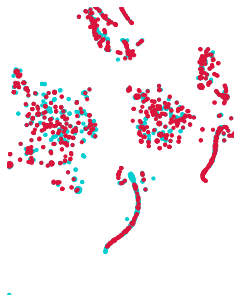

In [11]:
fig, ax = plt.subplots(1, 1)
# ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=label.values, s=1, cmap=plt.get_cmap('tab20'))
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
# ax.set_xlim(-100, 100)
# ax.set_ylim(-100, 100)
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'Basic.pdf')
plt.show()

total time 13.760457515716553


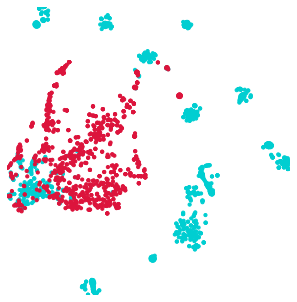

In [12]:
# PnCGCN
dp_gcn_feature = pd.read_pickle('all_PnCGCN_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'DP_GCN.pdf')
plt.show()

total time 16.265438318252563


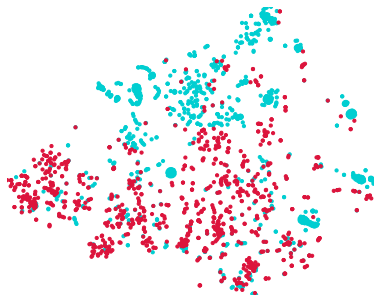

In [13]:
# GCN
dp_gcn_feature = pd.read_pickle('all_GCN_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'GCN.pdf')
plt.show()

total time 16.400998830795288


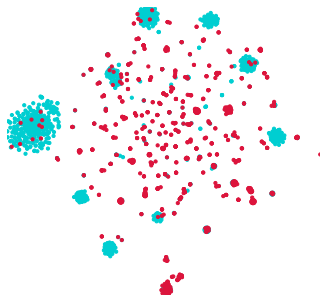

In [14]:
# graph attention 

dp_gcn_feature = pd.read_pickle('all_graph_attention_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'graphAttention.pdf')
plt.show()

total time 13.004856586456299


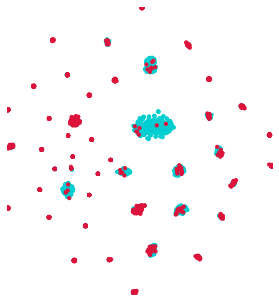

In [15]:
# all_netra_TaxZ.pickle
dp_gcn_feature = pd.read_pickle('all_netra_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'netra.pdf')
plt.show()

total time 15.167920351028442


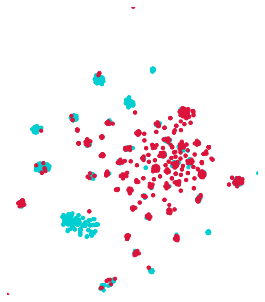

In [16]:
# all_sdne_TaxZ.pickle
dp_gcn_feature = pd.read_pickle('all_sdne_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'sdne.pdf')
plt.show()

total time 19.70838236808777


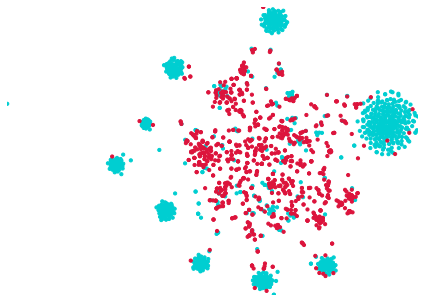

In [17]:
# all_walklets_TaxZ.pickle
dp_gcn_feature = pd.read_pickle('all_walklets_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'walklets.pdf')
plt.show()

total time 17.962043523788452


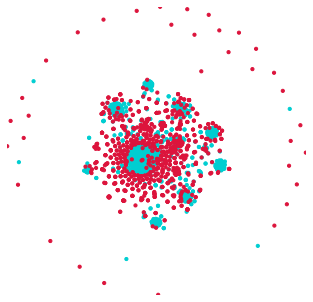

In [18]:
# all_deepwalk_TaxZ.pickle
dp_gcn_feature = pd.read_pickle('all_deepwalk_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'deepwalk.pdf')
plt.show()

total time 15.725465297698975


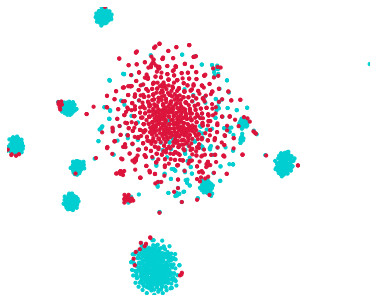

In [19]:
# all_node2vec_TaxZ.pickle
dp_gcn_feature = pd.read_pickle('all_node2vec_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'node2vec.pdf')
plt.show()

total time 13.488673448562622


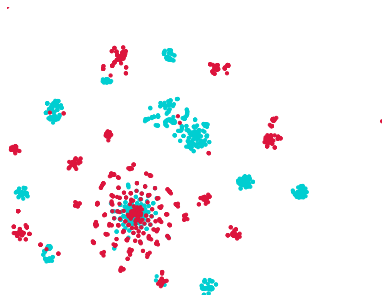

In [20]:
# all_GraRep_TaxZ.pickle
dp_gcn_feature = pd.read_pickle('all_GraRep_TaxZ.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'GraRep.pdf')
plt.show()